# Feature Engineering & EDA
## Goal
Build core features for the podium prediction model:
- Qualifying position
- Driver's historical AUS GP podium rate
- Constructor's historical AUS GP podium rate
- Binary target column (1 = podium, 0 = not)

# Core libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data

In [2]:
df = pd.read_csv('aus_gp_data.csv')
print(df.shape)
print(df.head())

(39, 7)
   DriverNumber Abbreviation         TeamName  GridPosition  Position  Year  \
0             1          VER  Red Bull Racing           1.0       1.0  2023   
1            44          HAM         Mercedes           3.0       2.0  2023   
2            14          ALO     Aston Martin           4.0       3.0  2023   
3            18          STR     Aston Martin           6.0       4.0  2023   
4            11          PER  Red Bull Racing          20.0       5.0  2023   

   Podium  
0       1  
1       1  
2       1  
3       0  
4       0  


# Check for missing values in each column

In [3]:
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
DriverNumber    0
Abbreviation    0
TeamName        0
GridPosition    0
Position        0
Year            0
Podium          0
dtype: int64


# Check how many podium vs non-podium finishes we have

In [4]:
print("Class balance:")
print(df['Podium'].value_counts())
print()
print("Podium rate:", round(df['Podium'].mean() * 100, 1), "%")

Class balance:
Podium
0    33
1     6
Name: count, dtype: int64

Podium rate: 15.4 %


# Calculate each driver's podium rate at AUS GP across all years in our dataset
# => historically, how often does this driver podium here?


In [5]:
driver_podium_rate = df.groupby('Abbreviation')['Podium'].mean().reset_index()
driver_podium_rate.columns = ['Abbreviation', 'driver_aus_podium_rate']

print(driver_podium_rate.sort_values('driver_aus_podium_rate', ascending=False))

   Abbreviation  driver_aus_podium_rate
1           ALO                     0.5
15          SAI                     0.5
9           NOR                     0.5
7           LEC                     0.5
5           HAM                     0.5
19          VER                     0.5
3           DEV                     0.0
2           BOT                     0.0
0           ALB                     0.0
4           GAS                     0.0
10          OCO                     0.0
8           MAG                     0.0
6           HUL                     0.0
12          PIA                     0.0
11          PER                     0.0
14          RUS                     0.0
13          RIC                     0.0
16          SAR                     0.0
17          STR                     0.0
18          TSU                     0.0
20          ZHO                     0.0


# Calculate each constructor's podium rate at AUS GP
# Constructors with strong history here are more likely to podium again

In [10]:
constructor_podium_rate = df.groupby('TeamName')['Podium'].mean().reset_index()
constructor_podium_rate.columns = ['TeamName', 'constructor_aus_podium_rate']

print(constructor_podium_rate.sort_values('constructor_aus_podium_rate', ascending=False))

           TeamName  constructor_aus_podium_rate
4           Ferrari                         0.50
3      Aston Martin                         0.25
7           McLaren                         0.25
10  Red Bull Racing                         0.25
8          Mercedes                         0.25
2            Alpine                         0.00
0        Alfa Romeo                         0.00
1        AlphaTauri                         0.00
6       Kick Sauber                         0.00
5      Haas F1 Team                         0.00
9                RB                         0.00
11         Williams                         0.00


# Merge driver podium rate and constructor podium rate back onto main dataframe
# GridPosition is already in df 

In [11]:
df = df.merge(driver_podium_rate, on='Abbreviation', how='left')
df = df.merge(constructor_podium_rate, on='TeamName', how='left')

# Preview final feature set

In [12]:
print(df[['Abbreviation', 'TeamName', 'GridPosition', 
          'driver_aus_podium_rate', 'constructor_aus_podium_rate', 'Podium']].head(10))

  Abbreviation         TeamName  GridPosition  driver_aus_podium_rate  \
0          VER  Red Bull Racing           1.0                     0.5   
1          HAM         Mercedes           3.0                     0.5   
2          ALO     Aston Martin           4.0                     0.5   
3          STR     Aston Martin           6.0                     0.0   
4          PER  Red Bull Racing          20.0                     0.0   
5          NOR          McLaren          13.0                     0.5   
6          HUL     Haas F1 Team          10.0                     0.0   
7          PIA          McLaren          16.0                     0.0   
8          ZHO       Alfa Romeo          17.0                     0.0   
9          TSU       AlphaTauri          12.0                     0.0   

   constructor_aus_podium_rate  Podium  
0                         0.25       1  
1                         0.25       1  
2                         0.25       1  
3                         0.25  

#  Plot distributions

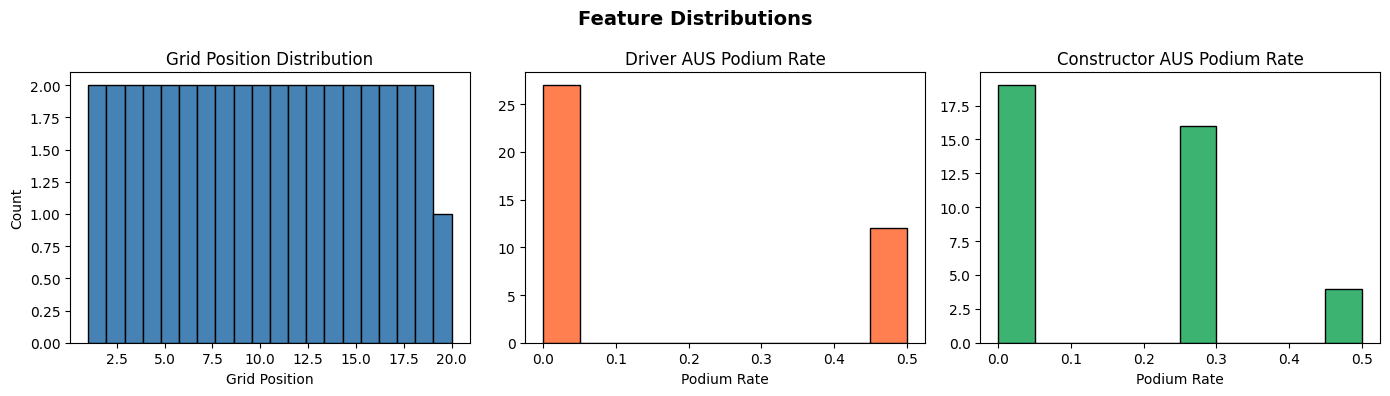

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Grid Position distribution

axes[0].hist(df['GridPosition'], bins=20, color='steelblue', edgecolor='black')
axes[0].set_title('Grid Position Distribution')
axes[0].set_xlabel('Grid Position')
axes[0].set_ylabel('Count')

# Driver podium rate distribution

axes[1].hist(df['driver_aus_podium_rate'], bins=10, color='coral', edgecolor='black')
axes[1].set_title('Driver AUS Podium Rate')
axes[1].set_xlabel('Podium Rate')

# Constructor podium rate distribution

axes[2].hist(df['constructor_aus_podium_rate'], bins=10, color='mediumseagreen', edgecolor='black')
axes[2].set_title('Constructor AUS Podium Rate')
axes[2].set_xlabel('Podium Rate')

plt.suptitle('Feature Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Save the engineered feature set for use in modeling

In [24]:
df.to_csv('aus_gp_features.csv', index=False)
print("Saved! Columns:", df.columns.tolist())

Saved! Columns: ['DriverNumber', 'Abbreviation', 'TeamName', 'GridPosition', 'Position', 'Year', 'Podium', 'driver_aus_podium_rate_x', 'constructor_aus_podium_rate_x', 'driver_aus_podium_rate_y', 'constructor_aus_podium_rate_y', 'driver_aus_podium_rate', 'constructor_aus_podium_rate']
